## Első mintavizsga

### 1. feladat [10p]

A `birthdays` lista kitalált személyek nevét és születési dátumát tartalmazza. Készíts programot, amely megkeresi, hogy kik állnak életkorban egymáshoz a legközelebb, és hány nap köztük a különbség! A program ne csak a megadott `birthdays` listára működjön, hanem tetszőleges, ugyanilyen formátumú bemenetre is! Feltehetjük, hogy minden név különböző, és legalább két név van megadva.

```
birthdays = [
    ('Kovács Andor',   '1999-10-29'),
    ('Kiss Martina',   '2000-02-13'),
    ('Horváth Barna',  '1999-12-05'),
    ('Győri Eszter',   '2000-10-29'),
    ('Nagy Tivadar',   '1999-08-16'),
    ('Tóth Tamara',    '2000-01-30'),
    ('Szakács Sándor', '1999-09-02')
]
```

In [2]:
birthdays = [
    ('Kovács Andor',   '1999-10-29'),
    ('Kiss Martina',   '2000-02-13'),
    ('Horváth Barna',  '1999-12-05'),
    ('Győri Eszter',   '2000-10-29'),
    ('Nagy Tivadar',   '1999-08-16'),
    ('Tóth Tamara',    '2000-01-30'),
    ('Szakács Sándor', '1999-09-02')
]
birthdays

[('Kovács Andor', '1999-10-29'),
 ('Kiss Martina', '2000-02-13'),
 ('Horváth Barna', '1999-12-05'),
 ('Győri Eszter', '2000-10-29'),
 ('Nagy Tivadar', '1999-08-16'),
 ('Tóth Tamara', '2000-01-30'),
 ('Szakács Sándor', '1999-09-02')]

In [24]:
# 1. megoldás

import datetime

# sztring => dátum konverzió
def parse_date(datestr):
    y, m, d = datestr.split('-')
    return datetime.date(int(y), int(m), int(d))

# végigmegyünk az összes páron
n = len(birthdays)
pairs = []
for i in range(n - 1):
    for j in range(i + 1, n):
        name1, date1 = birthdays[i]
        name2, date2 = birthdays[j]
        diff = abs((parse_date(date1) - parse_date(date2)).days)
        pairs.append((diff, name1, name2))

# minimumkeresés
min(pairs)

(14, 'Kiss Martina', 'Tóth Tamara')

In [34]:
# 2. megoldás

import datetime, itertools

# végigmegyünk az összes páron
for (name1, date1), (name2, date2) in itertools.combinations(birthdays, 2):
    parse = lambda s: datetime.datetime.strptime(s, '%Y-%m-%d')
    diff = abs((parse(date1) - parse(date2)).days)
    pairs.append((diff, name1, name2))

# minimumkeresés
min(pairs)

(14, 'Kiss Martina', 'Tóth Tamara')

### 2. feladat [14p]

Az [investments.txt](investments.txt) szövegfájl amerikai cégekbe történő befektetésekről tartalmaz adatokat (a TechCrunch hírportál alapján). Készíts programot, amely kiszámítja és kiírja az alábbi statisztikákat:

- Hány cég (`company`) szerepel összesen az adathalmazban?
- Melyik cégbe fektettek be a legtöbbször?
- Cégkategóriánként (`category`) hány dollárt fektettek be összesen (`raisedAmt`)?

In [1]:
# adatok beolvasása
import pandas as pd
df = pd.read_csv('investments.txt', sep='|')
df

,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,LifeLock,NaN,web,Tempe,AZ,1-May-07,6850000,USD,b
1,LifeLock,NaN,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,LifeLock,NaN,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,MyCityFaces,7.0,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,Flypaper,NaN,web,Phoenix,AZ,1-Feb-08,3000000,USD,a
...,...,...,...,...,...,...,...,...,...
1429,Trusera,15.0,web,Seattle,WA,1-Jun-07,2000000,USD,angel
1430,Alerts.com,NaN,web,Bellevue,WA,8-Jul-08,1200000,USD,a
1431,Myrio,75.0,software,Bothell,WA,1-Jan-01,20500000,USD,unattributed
1432,Grid Networks,NaN,web,Seattle,WA,30-Oct-07,9500000,USD,a


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1434 non-null   object 
 1   numEmps         565 non-null    float64
 2   category        1434 non-null   object 
 3   city            1416 non-null   object 
 4   state           1434 non-null   object 
 5   fundedDate      1434 non-null   object 
 6   raisedAmt       1434 non-null   int64  
 7   raisedCurrency  1434 non-null   object 
 8   round           1434 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 101.0+ KB


In [41]:
# Cégek száma.
df['company'].nunique()

891

In [43]:
len(set(df['company']))

891

In [49]:
# Melyik cégbe fektettek be a legtöbbször?
df.groupby('company').size().idxmax()

'Facebook'

In [55]:
df['company'].value_counts().index[0]

'Facebook'

In [58]:
# Cégkategóriánként (category) hány dollárt fektettek be összesen (raisedAmt)?

# ellenőrzés
df['raisedCurrency'].value_counts()

USD    1434
Name: raisedCurrency, dtype: int64

In [61]:
# a lekérdezés
df.groupby('category')['raisedAmt'].sum()

category
biotech          77250000
cleantech       258900000
consulting       32135000
hardware        824500000
mobile          323020000
other           119850000
software       1017942000
web           11753474750
Name: raisedAmt, dtype: int64

<AxesSubplot:ylabel='raisedAmt'>

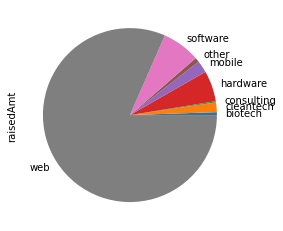

In [64]:
# nem része a feladatnak, de ábrázoljuk is az eredményt
df.groupby('category')['raisedAmt'].sum().plot(kind='pie')

<hr style="height: 3px;">

## Második mintavizsga

### 1. feladat [10p]

Készíts programot, amely bekéri a felhasználótól $n$ értékét, szimulál $n$ darab kockadobást, majd kiírja, hogy mi volt a leghosszabb 6-os sorozat hossza! Példa futási eredmény:
```

n: 50
31554643644341364414422455514666664664563666113524
A leghosszabb 6-os sorozat hossza: 5
```

In [4]:
import random

# n bekérése
n = int(input('n: '))

# dobások szimulálása
rolls = [random.randint(1, 6) for i in range(n)]
print(''.join([str(r) for r in rolls]))

# leghosszabb 6-os sorozat megkeresése
c = 0
cmax = 0
for r in rolls:
    if r == 6: c+= 1
    else: c = 0
    if c > cmax:
        cmax = c
print('A leghosszabb 6-os sorozat hossza:',cmax)

n: 50
56112564424352665353165323615556563233626345152444
A leghosszabb 6-os sorozat hossza: 2


### 2. feladat [14p]

A [hotels.txt](hotels.txt) szövegfájl Las Vegas-i szállodák értékeléséről tartalmaz adatokat. Minden sor egy szállóvendég által kiosztott értékeléshez tartozik. Készíts programot, amely kiszámítja és kiírja az alábbi statisztikákat:

- A szobák száma (`Nr. rooms`) alapján melyik az öt legnagyobb szálloda?
- Hány ponttal magasabb a medencével (`Pool`) rendelkező szállodák átlagos értékelése (`Score`) a többi szálloda átlagos értékelésénél?
- Hány ponttal magasabb a teniszpályával (`Tennis court`) rendelkező szállodák átlagos értékelése a többi szálloda átlagos értékelésénél?

In [ ]:
# Makro vagy mikro átlagot használjunk? Ennél a feladatnál mindkettő ugyanazt az eredményt adja.

In [82]:
# Adatok betöltése.
import pandas as pd
df = pd.read_csv('hotels.txt', sep=';')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hotel name      504 non-null    object
 1   Nr. rooms       504 non-null    int64 
 2   Pool            504 non-null    object
 3   Gym             504 non-null    object
 4   Tennis court    504 non-null    object
 5   Spa             504 non-null    object
 6   Casino          504 non-null    object
 7   Traveler type   504 non-null    object
 8   Period of stay  504 non-null    object
 9   Score           504 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 39.5+ KB


In [91]:
# A szobák száma (Nr. rooms) alapján melyik az öt legnagyobb szálloda?
df.groupby('Hotel name')['Nr. rooms'].first().sort_values(ascending=False).head(5)

Hotel name
The Venetian Las Vegas Hotel              4027
Excalibur Hotel & Casino                  3981
Bellagio Las Vegas                        3933
Circus Circus Hotel & Casino Las Vegas    3773
Caesars Palace                            3348
Name: Nr. rooms, dtype: int64

In [100]:
# Hány ponttal magasabb a medencével (Pool) rendelkező szállodák átlagos értékelése (Score)
# a többi szálloda átlagos értékelésénél?

# mikro átlaggal
df[df['Pool'] == 'YES']['Score'].mean() - df[df['Pool'] == 'NO']['Score'].mean()

0.9604166666666667

In [98]:
# makro átlaggal
has_pool = df['Pool'] == 'YES'
m1 = df[has_pool].groupby('Hotel name')['Score'].mean().mean()
m2 = df[~has_pool].groupby('Hotel name')['Score'].mean().mean()
m1 - m2

0.9604166666666667

In [101]:
# Hány ponttal magasabb a teniszpályával (Tennis court) rendelkező szállodák átlagos értékelése
# a többi szálloda átlagos értékelésénél?

# mikro átlaggal
df[df['Tennis court'] == 'YES']['Score'].mean() - df[df['Tennis court'] == 'NO']['Score'].mean()

0.15572916666666625